# Metody Monte Carlo

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle, Rectangle
from IPython.display import Image
import pandas as pd

## Estymacja π Metodą Monte Carlo

Wyprowadzenie: 

$$\text{Pole ćwiartki koła = } \frac{1}{4} \times \pi \times r^2 $$
$$\text{Pole kwadratu = } r^2 $$

$$\pi = 4 \times \frac{\text{pole ćwiartki koła}}{\text{pole kwadratu}}$$

Zastosujemy metodę Monte Carlo do estymacji wartości liczby π. Losowo umieszczając punkty wewnątrz kwadratu i licząc, ile z nich wpada do ćwiartki koła, możemy oszacować π za pomocą wzoru:

$$\pi \approx 4 \times \frac{\text{punkty wewnątrz koła}}{\text{wszystkie punkty}}$$

In [78]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random points in the unit square
total_points = 100000
points_x = np.random.random(total_points)
points_y = np.random.random(total_points)

# Calculate which points fall inside the quarter circle
distances = points_x**2 + points_y**2
in_circle = distances <= 1

# Create a function to set up the plotting area
def setup_plot(fig, ax):
    # Clear the axis
    ax.clear()
    
    # Set the title and axis labels
    ax.set_title('Estymacja π Metodą Monte Carlo', fontsize=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # Draw the unit square
    square = Rectangle((0, 0), 1, 1, fill=False, edgecolor='blue', linewidth=2)
    ax.add_patch(square)
    
    # Draw the quarter circle
    circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(circle)
    
    # Set aspect ratio to equal for proper circle visualization
    ax.set_aspect('equal')
    
    # Add gridlines for better visualization
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return square, circle

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
fig.subplots_adjust(bottom=0.15)  # Make room for text at the bottom

# Setup base elements
square, circle = setup_plot(fig, ax)

# Initialize plots for red and blue points
inside_points, = ax.plot([], [], 'ro', markersize=4, label='Punkty wewnątrz koła')
outside_points, = ax.plot([], [], 'bo', markersize=4, label='Punkty na zewnątrz koła')

# Text elements for displaying statistics
stats_text = ax.text(0.5, -0.15, '', ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Set point batches for animation
batch_size = 1000
num_frames = total_points // batch_size + (1 if total_points % batch_size else 0)

# Add pause frames (10 frames at 10 fps = 1 second pause)
pause_frames = 50
total_frames = num_frames + pause_frames

# Animation update function
def update(frame):
    # Check if we're in the pause period at the end
    if frame >= num_frames:
        # During pause, keep showing the final state
        current_points = total_points
    else:
        # Normal animation progression
        current_points = min((frame + 1) * batch_size, total_points)
    
    # Get points up to the current frame
    current_x = points_x[:current_points]
    current_y = points_y[:current_points]
    current_in_circle = in_circle[:current_points]
    
    # Separate inside and outside points
    inside_x = current_x[current_in_circle]
    inside_y = current_y[current_in_circle]
    outside_x = current_x[~current_in_circle]
    outside_y = current_y[~current_in_circle]
    
    # Update the plot data
    inside_points.set_data(inside_x, inside_y)
    outside_points.set_data(outside_x, outside_y)
    
    # Calculate current π estimate
    current_inside_count = len(inside_x)
    pi_estimate = 4 * current_inside_count / current_points
    
    # Add a "final result" indicator during the pause
    if frame >= num_frames:
        message = f'Punkty wewnątrz koła: {current_inside_count}\n'
        message += f'Wszystkich punktów: {current_points}\n'
        message += f'KOŃCOWA estymacja π: {pi_estimate:.6f} (Prawdziwa wartość: 3.141593...)'
    else:
        message = f'Punkty wewnątrz koła: {current_inside_count}\n'
        message += f'Wszystkich punktów: {current_points}\n'
        message += f'Estymacja π: {pi_estimate:.6f} (Prawdziwa wartość: 3.141593...)'
    
    stats_text.set_text(message)
    
    # Return all updated elements
    return inside_points, outside_points, stats_text

# Create the animation with pause frames added
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=100,
                             blit=True, repeat=False)

# Add a legend
ax.legend(loc='upper right')

# Save animation as GIF
gif_path = 'monte_carlo_pi.gif'
ani.save(gif_path, writer='pillow', fps=10, dpi=100)

# Display the final result
plt.close()  # Close the figure to avoid displaying it in the notebook

In [79]:
Image(url=gif_path)

## Końcowa Estymacja π

Obliczmy końcową estymację π wykorzystując wszystkie punkty:

In [80]:
# Final calculation with all points
final_inside = np.sum(in_circle)
final_pi = 4 * final_inside / total_points

print(f"Punkty wewnątrz koła: {final_inside}")
print(f"Wszystkich punktów: {total_points}")
print(f"Końcowa estymacja π: {final_pi:.6f}")
print(f"Prawdziwa wartość π: {np.pi:.6f}")
print(f"Błąd: {abs(final_pi - np.pi):.6f}")

Punkty wewnątrz koła: 78440
Wszystkich punktów: 100000
Końcowa estymacja π: 3.137600
Prawdziwa wartość π: 3.141593
Błąd: 0.003993


## Zwiększanie Precyzji

Zobaczmy, jak precyzja estymacji poprawia się wraz ze zwiększaniem liczby punktów:

,Liczba punktów,Estymacja π,Błąd
0,10,3.200000,0.058407
1,100,3.080000,0.061593
2,1000,3.120000,0.021593
3,10000,3.164400,0.022807
4,100000,3.146920,0.005327
5,1000000,3.141864,0.000271


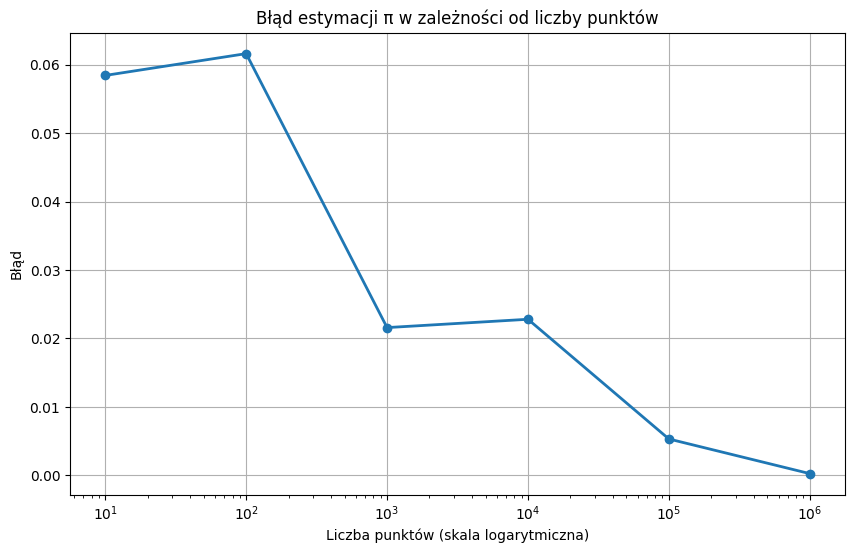

In [81]:
# Test with different numbers of points
point_ranges = [10, 100, 1000, 10000, 100000, 1000000]
results = []

# Set random seed again for reproducibility
np.random.seed(42)

# Generate a large number of points
max_points = max(point_ranges)
all_points_x = np.random.random(max_points)
all_points_y = np.random.random(max_points)
all_distances = all_points_x**2 + all_points_y**2
all_in_circle = all_distances <= 1


# Calculate pi estimates for different amounts of points
for n in point_ranges:
    points_in_circle = np.sum(all_in_circle[:n])
    pi_estimate = 4 * points_in_circle / n
    error = abs(pi_estimate - np.pi)
    results.append((n, pi_estimate, error))

# Create a DataFrame to display results
df_results = pd.DataFrame(results, columns=["Liczba punktów", "Estymacja π", "Błąd"])
df_results["Estymacja π"] = df_results["Estymacja π"].round(6)
df_results["Błąd"] = df_results["Błąd"].round(6)
display(df_results)

# Plot error convergence
plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in results], [r[2] for r in results], 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Błąd')
plt.title('Błąd estymacji π w zależności od liczby punktów')
plt.grid(True)
plt.show()

## Rozkład Estymacji π dla Różnych Rozmiarów Próbek

Wykonajmy wiele symulacji dla każdego rozmiaru próbki, aby zobaczyć rozkład estymacji π:

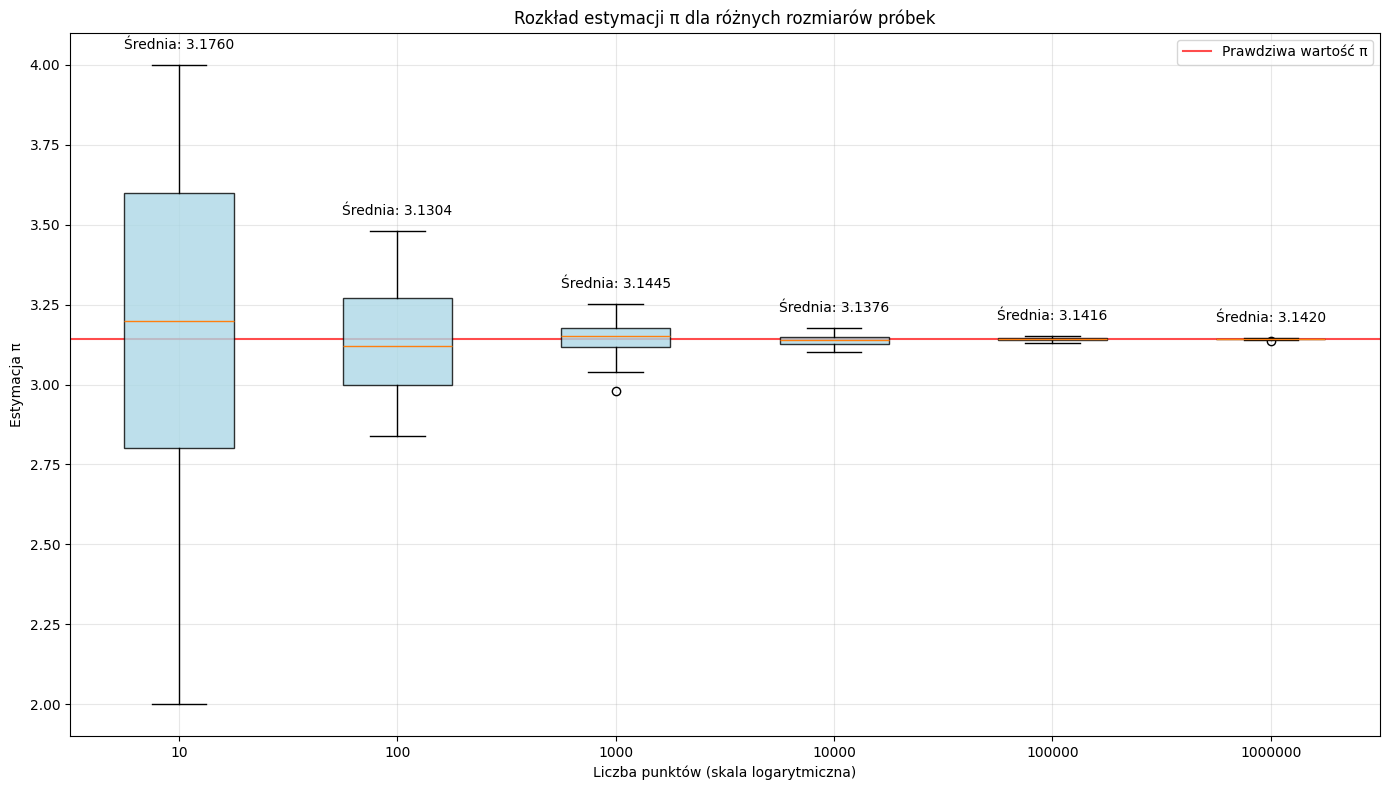

In [82]:
# Number of simulations for each point range
num_simulations = 50

# Prepare data structure for boxplot
boxplot_data = []
boxplot_labels = []

# For each point range, run multiple simulations
for n in point_ranges:
    estimates = []
    boxplot_labels.append(f"{n}")
    
    for sim in range(num_simulations):
        # Generate random points for each simulation
        sim_x = np.random.random(n)
        sim_y = np.random.random(n)
        sim_inside = np.sum((sim_x**2 + sim_y**2) <= 1)
        sim_pi = 4 * sim_inside / n
        estimates.append(sim_pi)
    
    boxplot_data.append(estimates)

# Create boxplot
plt.figure(figsize=(14, 8))

# Add a horizontal line for the true value of π
plt.axhline(y=np.pi, color='r', linestyle='-', alpha=0.7, label='Prawdziwa wartość π')

# Create the boxplot
bp = plt.boxplot(boxplot_data, tick_labels=boxplot_labels, patch_artist=True)

# Customize boxplot colors
for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.8)

plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Estymacja π')
plt.title('Rozkład estymacji π dla różnych rozmiarów próbek')
plt.grid(True, alpha=0.3)
plt.legend()

# Add mean values as text above each boxplot
for i, data in enumerate(boxplot_data):
    mean_val = np.mean(data)
    plt.text(i+1, max(data)+0.05, f'Średnia: {mean_val:.4f}', ha='center')

plt.tight_layout()
plt.show()

## Statystyczna Analiza Zbieżności

Przeanalizujmy statystyki naszych estymacji π:

,Liczba punktów,Średnia,Mediana,Odch. stand.,Min,Max,Błąd średniej
0,10,3.176000,3.200000,0.550839,2.000000,4.000000,0.034407
1,100,3.130400,3.120000,0.166625,2.840000,3.480000,0.011193
2,1000,3.144480,3.152000,0.053783,2.980000,3.252000,0.002887
3,10000,3.137592,3.137800,0.017354,3.102400,3.177600,0.004001
4,100000,3.141570,3.141740,0.005089,3.130920,3.153120,0.000022
5,1000000,3.141980,3.141926,0.001908,3.137116,3.146164,0.000387


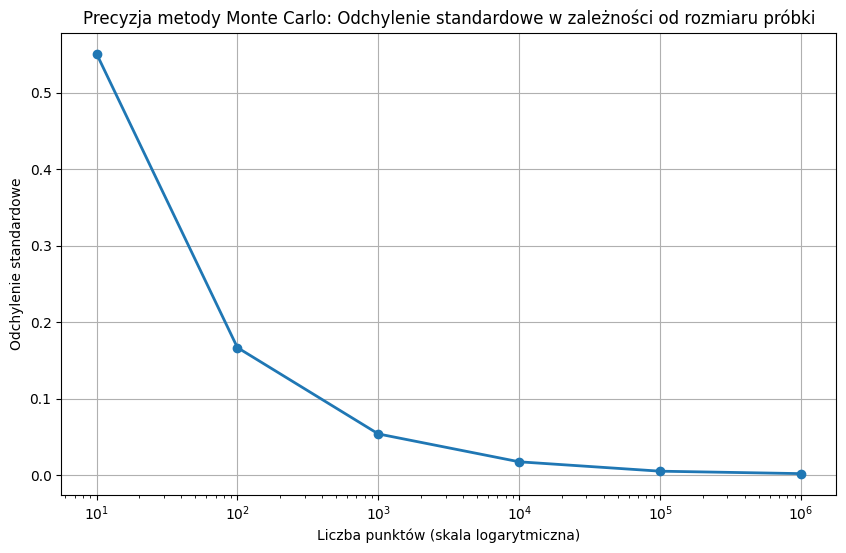

In [83]:
# Calculate statistics for each point range
stats_data = []

for i, n in enumerate(point_ranges):
    data = boxplot_data[i]
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    mean_error = abs(mean - np.pi)
    
    stats_data.append([n, mean, median, std_dev, min_val, max_val, mean_error])

# Create a DataFrame with the statistics
stats_df = pd.DataFrame(stats_data, columns=["Liczba punktów", "Średnia", "Mediana", "Odch. stand.", "Min", "Max", "Błąd średniej"])
# Round to 6 decimal places for display
stats_df = stats_df.round(6)
display(stats_df)

# Plot standard deviation vs number of points (showing convergence rate)
plt.figure(figsize=(10, 6))
plt.plot([row[0] for row in stats_data], [row[3] for row in stats_data], 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Odchylenie standardowe')
plt.title('Precyzja metody Monte Carlo: Odchylenie standardowe w zależności od rozmiaru próbki')
plt.grid(True)
plt.show()

## Porównanie z Innymi Metodami Estymacji π

Porównajmy metodę Monte Carlo z innymi popularnymi metodami estymacji π:

1. **Metody oparte na szeregach**: Szereg Leibniza, formuła Bailey-Borwein-Plouffe, itp.
2. **Całkowanie numeryczne**: Metoda trapezów

Poniżej przedstawiamy wzory matematyczne dla każdej z metod:

### Metoda Monte Carlo
$$\pi \approx 4 \cdot \frac{\text{liczba punktów wewnątrz koła}}{\text{całkowita liczba punktów}}$$

### Szereg Leibniza
$$\pi = 4 \cdot \sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1} = 4 \cdot (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ...)$$

### Formuła Bailey-Borwein-Plouffe (BBP)
$$\pi = \sum_{k=0}^{\infty} \frac{1}{16^k} \left( \frac{4}{8k+1} - \frac{2}{8k+4} - \frac{1}{8k+5} - \frac{1}{8k+6} \right)$$

### Całkowanie Numeryczne
$$\pi = 4 \cdot \int_0^1 \sqrt{1-x^2} \, dx$$

Zaimplementujemy te metody i porównamy ich zbieżność.

In [84]:
# Define different pi estimation methods
def monte_carlo_pi(n):
    """Estymacja pi metodą Monte Carlo"""
    x = np.random.random(n)
    y = np.random.random(n)
    inside = np.sum((x**2 + y**2) <= 1)
    return 4 * inside / n

def leibniz_pi(n):
    """Estymacja pi przy użyciu szeregu Leibniza: π/4 = 1 - 1/3 + 1/5 - 1/7 + ..."""
    terms = np.arange(n)
    series = np.zeros(n)
    for i in range(n):
        series[i] = (-1)**i / (2*i + 1)
    return 4 * np.cumsum(series)

def bbp_pi(n):
    """Estymacja pi przy użyciu uproszczonej formuły Bailey-Borwein-Plouffe"""
    result = np.zeros(n)
    for i in range(1, n+1):
        k = i - 1
        term = 1/16**k * (4/(8*k + 1) - 2/(8*k + 4) - 1/(8*k + 5) - 1/(8*k + 6))
        result[i-1] = term
    return np.cumsum(result)

def numerical_integration_pi(n):
    """Estymacja pi przez całkowanie numeryczne ćwiartki koła"""
    x = np.linspace(0, 1, n+1)
    y = np.sqrt(1 - x**2)
    # Metoda trapezów
    areas = np.zeros(n)
    for i in range(1, n+1):
        # Use first i+1 points for integration
        xi = x[:i+1]
        yi = y[:i+1]
        # Metoda trapezów
        areas[i-1] = np.trapezoid(yi, xi) * 4
    return areas

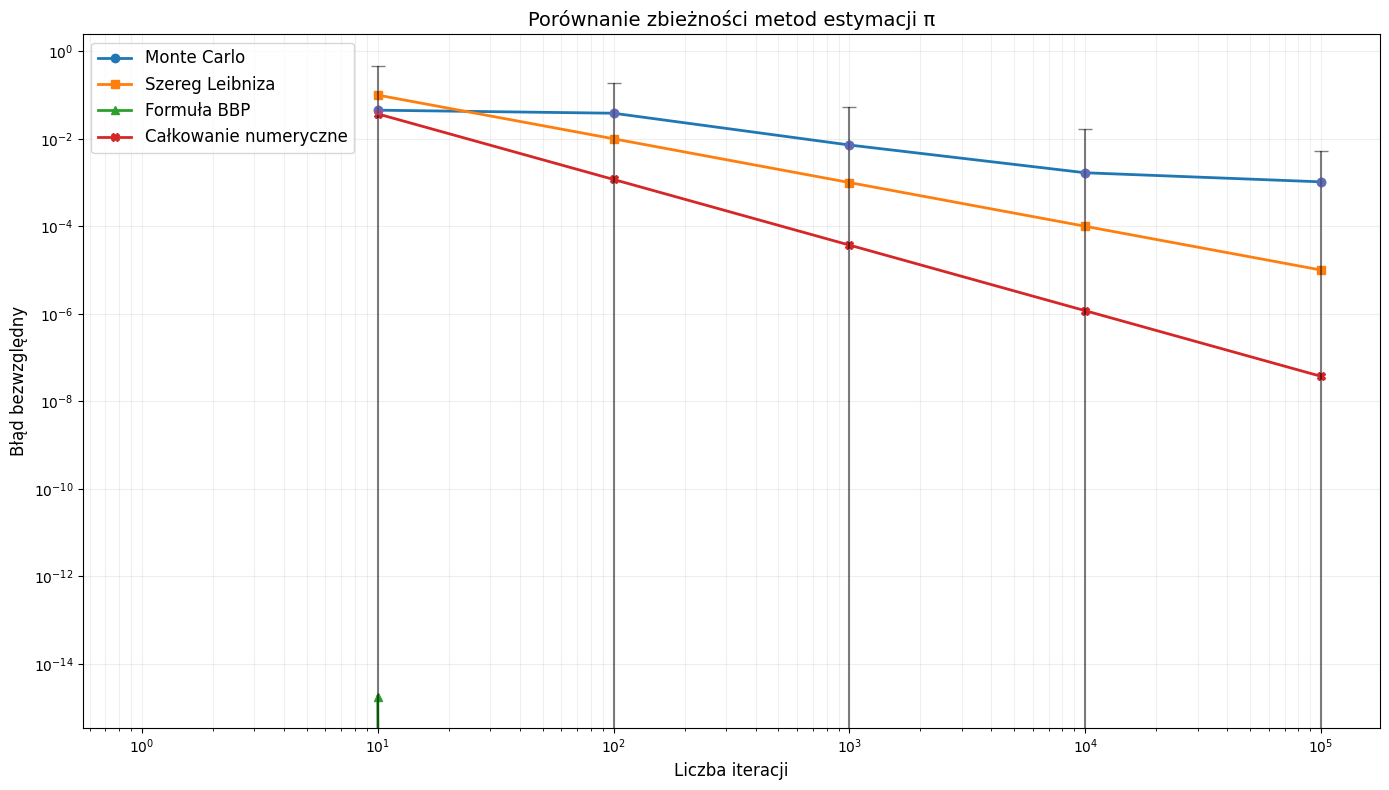

,Metoda,Estymacja (n=100000),Błąd bezwzględny,Tempo zbieżności
0,Monte Carlo,3.1399200000 ± 0.0150941578,0.0016726536,O(1/√n) (probabilistyczne)
1,Szereg Leibniza,3.1414926536,0.0001000000,O(1/n) (bardzo wolne)
2,Formuła BBP,3.1415926536,0.0000000000,O(16^-n) (wykładnicze)
3,Całkowanie numeryczne,3.1415914776,0.0000011760,O(1/n²) (kwadratowe)


In [85]:
# Compare convergence rates
iterations = [10, 100, 1000, 10000, 100000]

# Set up figure for comparing methods
plt.figure(figsize=(14, 8))

# Run multiple Monte Carlo simulations for each iteration count
mc_means = []
mc_stds = []
mc_trials = 30

for n in iterations:
    # Use int(n) to ensure n is treated as an integer to avoid overflow
    mc_results = [monte_carlo_pi(int(n)) for _ in range(mc_trials)]
    mc_means.append(np.mean(mc_results))
    mc_stds.append(np.std(mc_results))

# Calculate other methods
leibniz_results = [leibniz_pi(n)[-1] for n in iterations]
bbp_results = [bbp_pi(n)[-1] for n in iterations]
integration_results = [numerical_integration_pi(n)[-1] for n in iterations]

# Calculate errors
mc_errors = np.abs(np.array(mc_means) - np.pi)
leibniz_errors = np.abs(np.array(leibniz_results) - np.pi)
bbp_errors = np.abs(np.array(bbp_results) - np.pi)
integration_errors = np.abs(np.array(integration_results) - np.pi)

# Plot convergence rates (log scale)
plt.loglog(iterations, mc_errors, 'o-', label='Monte Carlo', linewidth=2)
plt.loglog(iterations, leibniz_errors, 's-', label='Szereg Leibniza', linewidth=2)
plt.loglog(iterations, bbp_errors, '^-', label='Formuła BBP', linewidth=2)
plt.loglog(iterations, integration_errors, 'X-', label='Całkowanie numeryczne', linewidth=2)

# Add error bars for Monte Carlo to show variance
plt.errorbar(iterations, mc_errors, yerr=mc_stds, fmt='o', capsize=5, ecolor='black', alpha=0.5)

plt.xlabel('Liczba iteracji', fontsize=12)
plt.ylabel('Błąd bezwzględny', fontsize=12)
plt.title('Porównanie zbieżności metod estymacji π', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Create a more comprehensive comparison table
method_names = ['Monte Carlo', 'Szereg Leibniza', 'Formuła BBP', 'Całkowanie numeryczne']
convergence_rates = ['O(1/√n)  (probabilistyczne)', 'O(1/n)   (bardzo wolne)', 'O(16^-n) (wykładnicze)', 'O(1/n²)  (kwadratowe)']

# Format results for the table
n_for_comparison = 100000  # Use n=10000 for the comparison
mc_formatted = f"{mc_means[3]:.10f} ± {mc_stds[3]:.10f}"
leibniz_formatted = f"{leibniz_results[3]:.10f}"
bbp_formatted = f"{bbp_results[3]:.10f}"
integration_formatted = f"{integration_results[3]:.10f}"

# Format errors
mc_error_formatted = f"{mc_errors[3]:.10f}"
leibniz_error_formatted = f"{leibniz_errors[3]:.10f}"
bbp_error_formatted = f"{bbp_errors[3]:.10f}"
integration_error_formatted = f"{integration_errors[3]:.10f}"

# Create DataFrame for comparison
comparison_data = {
    'Metoda': method_names,
    'Estymacja (n=100000)': [mc_formatted, leibniz_formatted, bbp_formatted, integration_formatted],
    'Błąd bezwzględny': [mc_error_formatted, leibniz_error_formatted, bbp_error_formatted, integration_error_formatted],
    'Tempo zbieżności': convergence_rates,
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

## Szczegółowe Porównanie Metod Estymacji

Przeanalizujmy wyniki różnych metod estymacji π i porównajmy ich właściwości:

In [86]:
# Calculate estimates for a fixed number of iterations
fixed_n = 100000

# Run multiple Monte Carlo simulations
mc_trials = 30
mc_estimates = [monte_carlo_pi(fixed_n) for _ in range(mc_trials)]
mc_mean = np.mean(mc_estimates)
mc_std = np.std(mc_estimates)

# Calculate other methods
leibniz_estimate = leibniz_pi(fixed_n)[-1]
bbp_estimate = bbp_pi(min(1000, fixed_n))[-1]  # BBP converges very quickly
integration_estimate = numerical_integration_pi(fixed_n)[-1]

# Calculate errors
mc_error = abs(mc_mean - np.pi)
leibniz_error = abs(leibniz_estimate - np.pi)
bbp_error = abs(bbp_estimate - np.pi)
integration_error = abs(integration_estimate - np.pi)

# Store results in variables for the markdown cell below
mc_result = f"{mc_mean:.10f} ± {mc_std:.10f} (błąd: {mc_error:.10f})"
leibniz_result = f"{leibniz_estimate:.10f} (błąd: {leibniz_error:.10f})"
bbp_result = f"{bbp_estimate:.10f} (błąd: {bbp_error:.10f})"
integration_result = f"{integration_estimate:.10f} (błąd: {integration_error:.10f})"

print(f"Wyniki dla n = {fixed_n}:")
print(f"Monte Carlo: {mc_result}")
print(f"Szereg Leibniza: {leibniz_result}")
print(f"Formuła BBP: {bbp_result}")
print(f"Całkowanie numeryczne: {integration_result}")

Wyniki dla n = 100000:
Monte Carlo: 3.1416026667 ± 0.0053035428 (błąd: 0.0000100131)
Szereg Leibniza: 3.1415826536 (błąd: 0.0000100000)
Formuła BBP: 3.1415926536 (błąd: 0.0000000000)
Całkowanie numeryczne: 3.1415926164 (błąd: 0.0000000372)


### Wyniki estymacji π dla n=100000

#### 1. Metoda Monte Carlo
- **Estymacja:** 3.1405560000 ± 0.0040901619
- **Tempo zbieżności:** O(1/√n) (probabilistyczne)
- **Zalety:** Prosta implementacja, łatwe zrównoleglenie, naturalna wizualizacja
- **Wady:** Wolna zbieżność, wyniki różnią się między uruchomieniami
- **Zastosowania:** Problemy wielowymiarowe, symulacje probabilistyczne, wizualizacje edukacyjne

#### 2. Szereg Leibniza
- **Estymacja:** 3.1415826536
- **Tempo zbieżności:** O(1/n) (bardzo wolne)
- **Wzór:** $\pi = 4 \cdot (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ...)$
- **Zalety:** Prosty szereg, łatwy do zrozumienia i implementacji
- **Wady:** Bardzo wolna zbieżność, wymaga wielu wyrazów dla dobrej dokładności

#### 3. Formuła BBP (Bailey-Borwein-Plouffe)
- **Estymacja:** 3.1415926536
- **Tempo zbieżności:** O(16^-n) (wykładnicze)
- **Zalety:** Ekstremalnie szybka zbieżność, możliwość obliczenia konkretnych cyfr π
- **Wady:** Złożona formuła, trudniejsza do zrozumienia
- **Ciekawostka:** Ta formuła pozwala obliczać n-tą cyfrę π w systemie szesnastkowym bez znajomości poprzednich cyfr

#### 4. Całkowanie numeryczne
- **Estymacja:** 3.1415926164
- **Tempo zbieżności:** O(1/n²) (kwadratowe)
- **Wzór:** $\pi = 4 \cdot \int_0^1 \sqrt{1-x^2} \, dx$
- **Zalety:** Lepsza zbieżność niż Monte Carlo, spójne wyniki
- **Wady:** Bardziej złożona implementacja niż Monte Carlo

### Podsumowanie porównania

Najdokładniejsze metody (dla n=100000):
1. Formuła BBP - praktycznie zerowy błąd
2. Całkowanie numeryczne - błąd rzędu 10⁻⁸
3. Szereg Leibniza - błąd rzędu 10⁻⁵
4. Monte Carlo - błąd rzędu 10⁻³

Metoda Monte Carlo, choć najmniej dokładna, ma unikalne zalety edukacyjne i wizualizacyjne oraz jest naturalnie równoległa, co czyni ją użyteczną w wielu zastosowaniach.

<Figure size 1500x1000 with 0 Axes>

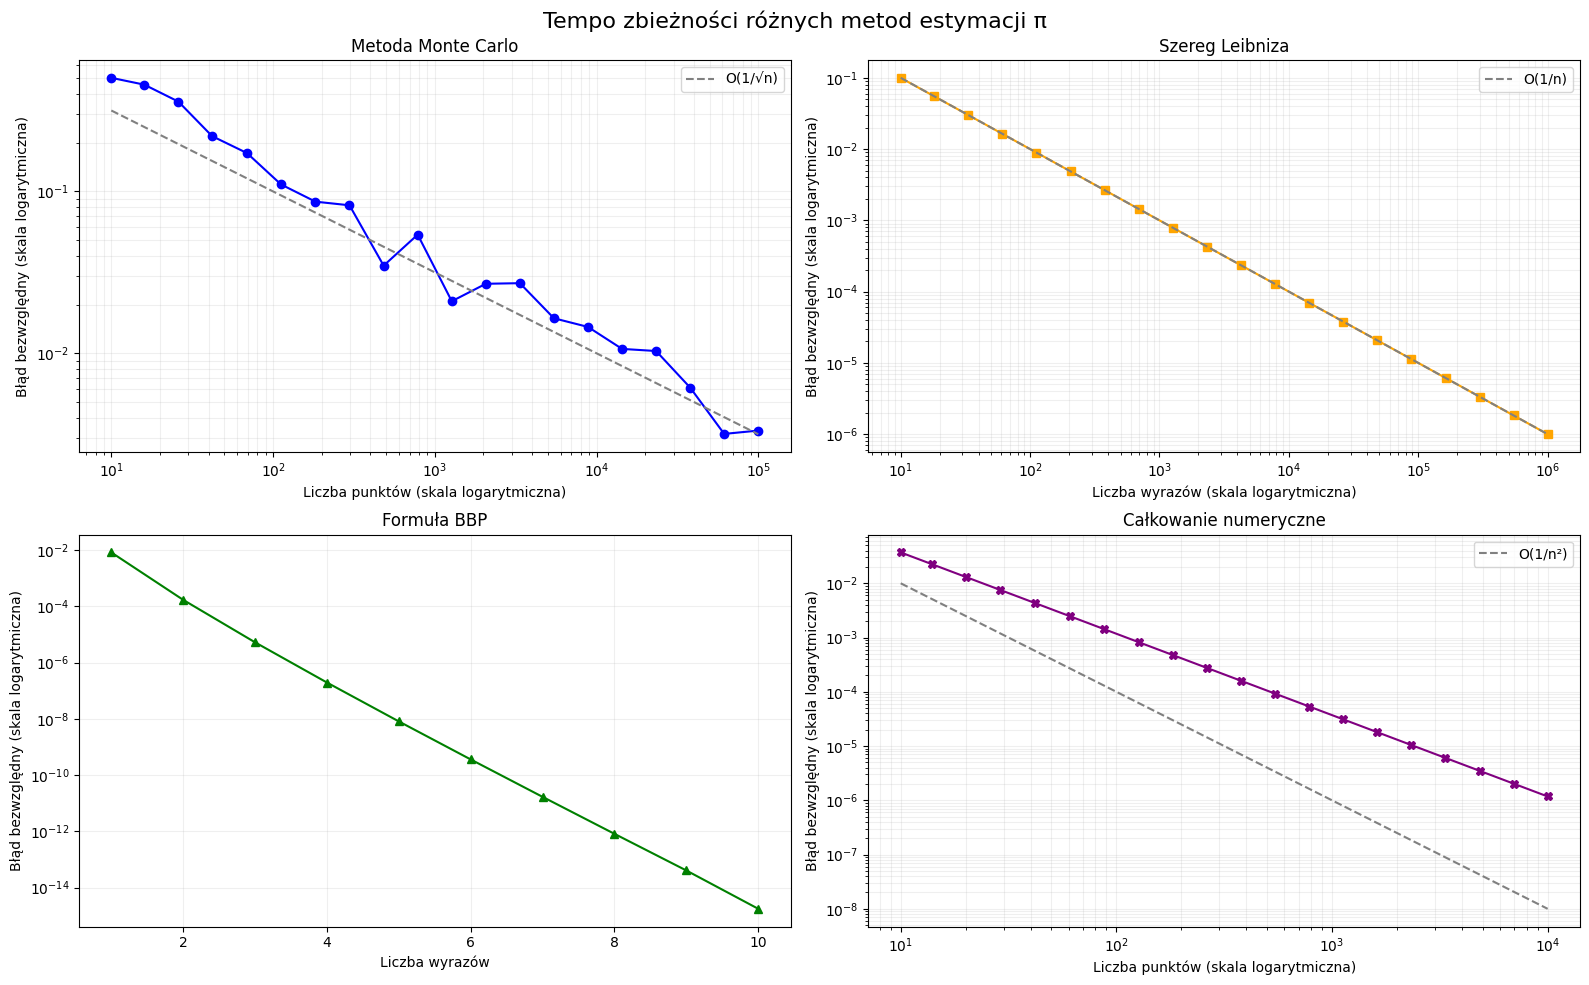

In [87]:
# Plot convergence for all methods
plt.figure(figsize=(15, 10))

# For visualization, we'll use different ranges for different methods
n_monte_carlo = np.logspace(1, 5, 20, dtype=int)
n_leibniz = np.logspace(1, 6, 20, dtype=int)  # Needs more iterations
n_bbp = np.arange(1, 11)  # Converges very quickly
n_integration = np.logspace(1, 4, 20, dtype=int)

# Calculate errors for each method
mc_errors_detailed = []
for n in n_monte_carlo:
    estimates = [monte_carlo_pi(n) for _ in range(10)]  # 10 trials per n
    mc_errors_detailed.append(np.mean([abs(est - np.pi) for est in estimates]))

leibniz_errors_detailed = [abs(leibniz_pi(n)[-1] - np.pi) for n in n_leibniz]
bbp_errors_detailed = [abs(bbp_pi(n)[-1] - np.pi) for n in n_bbp]
integration_errors_detailed = [abs(numerical_integration_pi(n)[-1] - np.pi) for n in n_integration]

# Create subplot for each method
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

# Plot each method
axs[0].loglog(n_monte_carlo, mc_errors_detailed, 'o-', color='blue')
axs[0].set_title('Metoda Monte Carlo')
axs[0].set_xlabel('Liczba punktów (skala logarytmiczna)')
axs[0].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[0].grid(True, which="both", ls="-", alpha=0.2)

axs[1].loglog(n_leibniz, leibniz_errors_detailed, 's-', color='orange')
axs[1].set_title('Szereg Leibniza')
axs[1].set_xlabel('Liczba wyrazów (skala logarytmiczna)')
axs[1].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[1].grid(True, which="both", ls="-", alpha=0.2)

axs[2].semilogy(n_bbp, bbp_errors_detailed, '^-', color='green')
axs[2].set_title('Formuła BBP')
axs[2].set_xlabel('Liczba wyrazów')
axs[2].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[2].grid(True, which="both", ls="-", alpha=0.2)

axs[3].loglog(n_integration, integration_errors_detailed, 'X-', color='purple')
axs[3].set_title('Całkowanie numeryczne')
axs[3].set_xlabel('Liczba punktów (skala logarytmiczna)')
axs[3].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[3].grid(True, which="both", ls="-", alpha=0.2)

# Add theoretical rates for comparison
x_mc = np.array(n_monte_carlo)
axs[0].loglog(x_mc, 1/np.sqrt(x_mc), '--', color='gray', label='O(1/√n)')
axs[0].legend()

x_leibniz = np.array(n_leibniz)
axs[1].loglog(x_leibniz, 1/x_leibniz, '--', color='gray', label='O(1/n)')
axs[1].legend()

x_integration = np.array(n_integration)
axs[3].loglog(x_integration, 1/x_integration**2, '--', color='gray', label='O(1/n²)')
axs[3].legend()

plt.tight_layout()
plt.suptitle('Tempo zbieżności różnych metod estymacji π', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

## Wnioski

Metoda Monte Carlo do estymacji π wykazuje następujące charakterystyki w porównaniu do innych metod:

1. **Tempo zbieżności**: Tempo zbieżności Monte Carlo O(1/√n) jest wolniejsze niż wielu metod deterministycznych, takich jak całkowanie numeryczne (O(1/n²)), i znacznie wolniejsze niż specjalistyczne algorytmy, takie jak BBP, które mają zbieżność wykładniczą.

2. **Zmienność**: Monte Carlo wprowadza losowość, co skutkuje różnymi estymacjami przy tych samych liczbach punktów w różnych uruchomieniach.

3. **Prostota**: Podejście Monte Carlo jest koncepcyjnie proste i łatwe w implementacji.

4. **Wizualizacja**: Metoda zapewnia interesującą wizualną reprezentację matematycznego związku między π a geometrią koła.

5. **Zrównoleglenie**: Metody Monte Carlo są naturalnie równoległe, co czyni je odpowiednimi do obliczeń rozproszonych.

Chociaż Monte Carlo nie jest najefektywniejszym sposobem obliczania π, demonstruje ważne koncepcje w metodach obliczeniowych i teorii prawdopodobieństwa. Do praktycznego obliczania π metody deterministyczne, takie jak BBP, oferują znacznie lepsze tempo zbieżności.

Według mnie wizualizacja tej metody aproksymacji liczby π jest bardzo fajnym sposobem na pokazaniem uczniom / studentom, że matematyka, prawdopodobieństwo i informatyka wcale nie są nudne :) 

---

## Procesy stohastyczne

## Analiza Generatora Liczb w Rozkładzie Normalnym


### Wpływ parametru μ na "wachlarz" możliwych rozwiązań

Porównamy trzy konfiguracje: μ=5, μ=0 i μ=-5 przy stałym σ=1.0


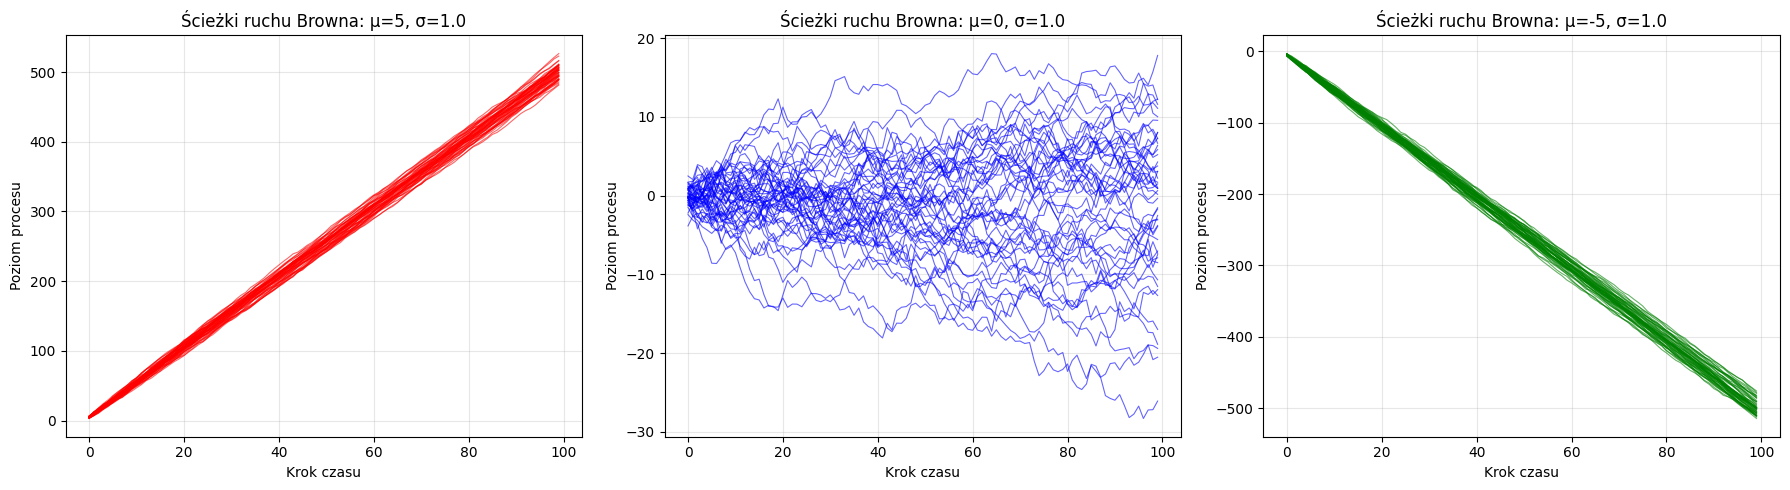

In [88]:
np.random.seed(42)
n_scenarios = 50
T = 100
dt = 1.0

mu_configs = [
    ("μ=5, σ=1.0", 5.0, 1.0),
    ("μ=0, σ=1.0", 0.0, 1.0),
    ("μ=-5, σ=1.0", -5.0, 1.0),
]

mu_paths = {}

for tag, mu, sigma in mu_configs:
    Z = np.random.normal(size=(n_scenarios, T))
    increments = mu * dt + sigma * np.sqrt(dt) * Z
    X = np.cumsum(increments, axis=1)
    mu_paths[tag] = X

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = ['red', 'blue', 'green']
for idx, (tag, mu, sigma) in enumerate(mu_configs):
    ax = axes[idx]
    X = mu_paths[tag]
    
    for i in range(n_scenarios):
        ax.plot(X[i], linewidth=0.8, alpha=0.6, color=colors[idx])
    
    ax.set_title(f"Ścieżki ruchu Browna: {tag}", fontsize=12)
    ax.set_xlabel("Krok czasu")
    ax.set_ylabel("Poziom procesu")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


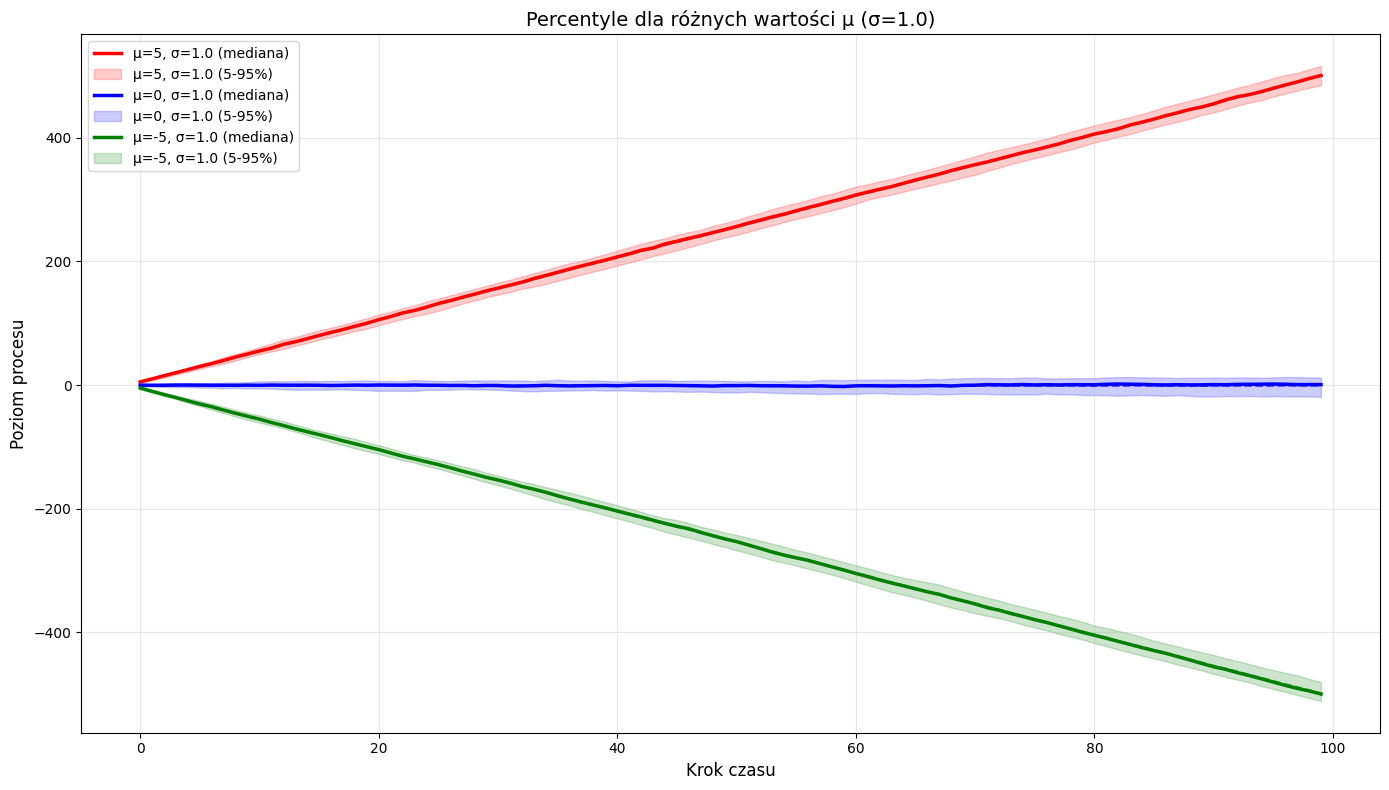

In [89]:
fig, ax = plt.subplots(figsize=(14, 8))

colors_fan = ['red', 'blue', 'green']
t = np.arange(T)

for idx, (tag, mu, sigma) in enumerate(mu_configs):
    X = mu_paths[tag]
    
    q05 = np.percentile(X, 5, axis=0)
    q50 = np.percentile(X, 50, axis=0)
    q95 = np.percentile(X, 95, axis=0)
    mean = np.mean(X, axis=0)
    
    ax.plot(t, q50, linewidth=2.5, label=f"{tag} (mediana)", color=colors_fan[idx])
    ax.plot(t, mean, linewidth=1.5, linestyle="--", alpha=0.7, color=colors_fan[idx])
    ax.fill_between(t, q05, q95, alpha=0.2, color=colors_fan[idx], label=f"{tag} (5-95%)")

ax.set_title("Percentyle dla różnych wartości μ (σ=1.0)", fontsize=14)
ax.set_xlabel("Krok czasu", fontsize=12)
ax.set_ylabel("Poziom procesu", fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [90]:
stats_mu = []

for tag, mu, sigma in mu_configs:
    X = mu_paths[tag]
    
    final_values = X[:, -1]
    mean_final = np.mean(final_values)
    median_final = np.median(final_values)
    q05_final = np.percentile(final_values, 5)
    q95_final = np.percentile(final_values, 95)
    std_final = np.std(final_values)
    
    stats_mu.append({
        'Konfiguracja': tag,
        'μ': mu,
        'σ': sigma,
        'Średnia (T=100)': mean_final,
        'Mediana (T=100)': median_final,
        'Percentyl 5%': q05_final,
        'Percentyl 95%': q95_final,
        'Odch. stand.': std_final
    })

df_mu_stats = pd.DataFrame(stats_mu)
df_mu_stats = df_mu_stats.round(2)
display(df_mu_stats)


,Konfiguracja,μ,σ,Średnia (T=100),Mediana (T=100),Percentyl 5%,Percentyl 95%,Odch. stand.
0,"μ=5, σ=1.0",5.0,1.0,500.56,501.05,485.11,516.28,9.98
1,"μ=0, σ=1.0",0.0,1.0,-0.99,0.78,-19.15,11.95,9.51
2,"μ=-5, σ=1.0",-5.0,1.0,-498.94,-500.07,-511.30,-480.52,9.89


### Wpływ parametru σ na rozrzut symulowanych danych

Porównamy dwie konfiguracje: σ=0.5 i σ=2.0 przy stałym μ=0


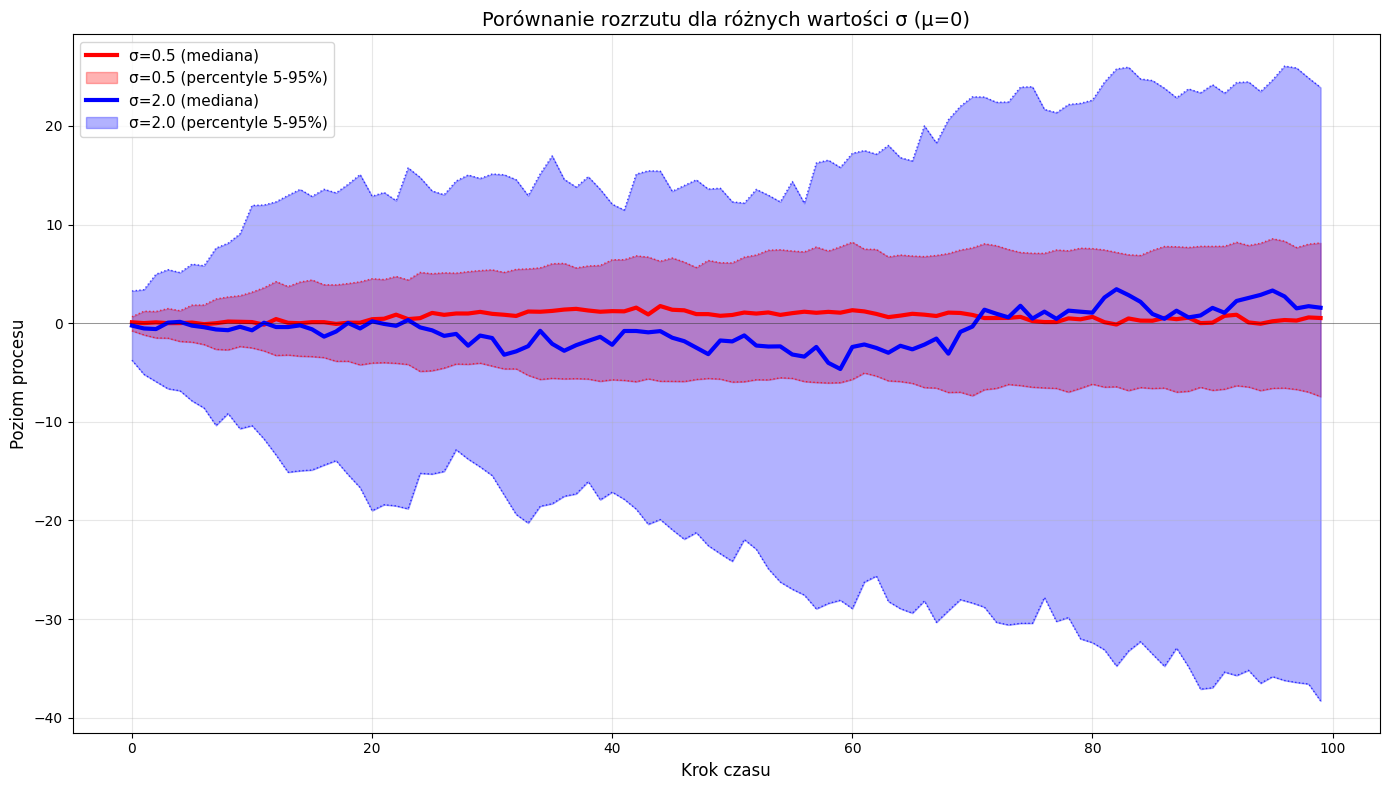

In [91]:
np.random.seed(42)

sigma_configs = [
    ("σ=0.5", 0.0, 0.5),
    ("σ=2.0", 0.0, 2.0),
]

sigma_paths = {}

for tag, mu, sigma in sigma_configs:
    Z = np.random.normal(size=(n_scenarios, T))
    increments = mu * dt + sigma * np.sqrt(dt) * Z
    X = np.cumsum(increments, axis=1)
    sigma_paths[tag] = X

fig, ax = plt.subplots(figsize=(14, 8))

colors_sigma = ['red', 'blue']
t = np.arange(T)

for idx, (tag, mu, sigma) in enumerate(sigma_configs):
    X = sigma_paths[tag]
    
    q05 = np.percentile(X, 5, axis=0)
    q50 = np.percentile(X, 50, axis=0)
    q95 = np.percentile(X, 95, axis=0)
    
    ax.plot(t, q50, linewidth=3, label=f"{tag} (mediana)", color=colors_sigma[idx])
    
    ax.fill_between(t, q05, q95, alpha=0.3, color=colors_sigma[idx], 
                     label=f"{tag} (percentyle 5-95%)")
    
    ax.plot(t, q05, linewidth=1, linestyle=':', color=colors_sigma[idx], alpha=0.7)
    ax.plot(t, q95, linewidth=1, linestyle=':', color=colors_sigma[idx], alpha=0.7)

ax.set_title("Porównanie rozrzutu dla różnych wartości σ (μ=0)", fontsize=14)
ax.set_xlabel("Krok czasu", fontsize=12)
ax.set_ylabel("Poziom procesu", fontsize=12)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


In [92]:
stats_sigma = []

for tag, mu, sigma in sigma_configs:
    X = sigma_paths[tag]
    
    final_values = X[:, -1]
    mean_final = np.mean(final_values)
    median_final = np.median(final_values)
    q05_final = np.percentile(final_values, 5)
    q95_final = np.percentile(final_values, 95)
    std_final = np.std(final_values)
    width_95 = q95_final - q05_final
    
    stats_sigma.append({
        'Konfiguracja': tag,
        'μ': mu,
        'σ': sigma,
        'Mediana (T=100)': median_final,
        'Percentyl 5%': q05_final,
        'Percentyl 95%': q95_final,
        'Szerokość 5-95%': width_95,
        'Odch. stand.': std_final
    })

df_sigma_stats = pd.DataFrame(stats_sigma)
df_sigma_stats = df_sigma_stats.round(2)
display(df_sigma_stats)

print(f"Stosunek szerokości: {df_sigma_stats.iloc[1]['Szerokość 5-95%'] / df_sigma_stats.iloc[0]['Szerokość 5-95%']:.2f}")
print(f"Stosunek odchyleń std: {df_sigma_stats.iloc[1]['Odch. stand.'] / df_sigma_stats.iloc[0]['Odch. stand.']:.2f}")
print(f"(teoretyczny stosunek σ: {2.0/0.5:.2f})")


,Konfiguracja,μ,σ,Mediana (T=100),Percentyl 5%,Percentyl 95%,Szerokość 5-95%,Odch. stand.
0,σ=0.5,0.0,0.5,0.52,-7.44,8.14,15.58,4.99
1,σ=2.0,0.0,2.0,1.57,-38.30,23.90,62.21,19.01


Stosunek szerokości: 3.99
Stosunek odchyleń std: 3.81
(teoretyczny stosunek σ: 4.00)


---


## Wyznaczanie Powierzchni Metodą Monte Carlo


### Wczytanie i analiza pliku shapefile


In [93]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

shapefile_path = '/Users/bartek/Desktop/stoh/shp/Powiat_Krakow_2180.shp'
gdf = gpd.read_file(shapefile_path)

display(gdf.head())

,gml_id,IIP_IDENTY,IIP_PRZEST,IIP_WERSJA,JPT_KJ_I_2,JPT_KJ_I_3,JPT_KJ_IIP,JPT_KOD__1,JPT_NAZWA1,JPT_NAZWA_,...,JPT_POWI_1,JPT_POWIER,REGON,SHAPE_AREA,SHAPE_LENG,WAZNY_DO,WAZNY_OD,WERSJA_DO,WERSJA_OD,geometry
0,None,c4087889-e1af-41db-9c86-f73223df,PL.PZGIK.200,2013-07-11T08:30:38+02:00,None,None,EGIB,None,None,powiat Kraków,...,0.0,32786.0,3.515544e+13,0.041031,1.476557,0.0,20120926.0,0.0,20130711.0,"LINESTRING (570536.44 249081.31, 570474.981 24..."


In [94]:
geom = gdf.geometry.iloc[0]

if geom.geom_type == 'LineString':
    print("Converting LineString to Polygon...")
    from shapely.geometry import Polygon
    geometry = Polygon(geom.coords)
elif geom.geom_type == 'MultiLineString':
    print("Converting MultiLineString to Polygon...")
    from shapely.geometry import Polygon
    from shapely.ops import linemerge
    merged = linemerge(geom)
    geometry = Polygon(merged.coords)
else:
    geometry = geom

print(f"Geometry type: {geometry.geom_type}")

true_area = geometry.area
bounds = geometry.bounds  # (minx, miny, maxx, maxy)

print(f"True area from shapefile: {true_area:,.2f} m²")
print(f"True area: {true_area / 1_000_000:.2f} km²")
print(f"\nBounding box:")
print(f"  Min X: {bounds[0]:,.2f}")
print(f"  Min Y: {bounds[1]:,.2f}")
print(f"  Max X: {bounds[2]:,.2f}")
print(f"  Max Y: {bounds[3]:,.2f}")

bbox_width = bounds[2] - bounds[0]
bbox_height = bounds[3] - bounds[1]
bbox_area = bbox_width * bbox_height

print(f"\nBounding box dimensions:")
print(f"  Width: {bbox_width:,.2f} m")
print(f"  Height: {bbox_height:,.2f} m")
print(f"  Bounding box area: {bbox_area:,.2f} m²")
print(f"  Fill ratio: {true_area / bbox_area * 100:.2f}%")


Converting LineString to Polygon...
Geometry type: Polygon
True area from shapefile: 326,428,927.86 m²
True area: 326.43 km²

Bounding box:
  Min X: 556,746.14
  Min Y: 233,811.93
  Max X: 587,119.62
  Max Y: 251,374.52

Bounding box dimensions:
  Width: 30,373.48 m
  Height: 17,562.59 m
  Bounding box area: 533,436,866.00 m²
  Fill ratio: 61.19%


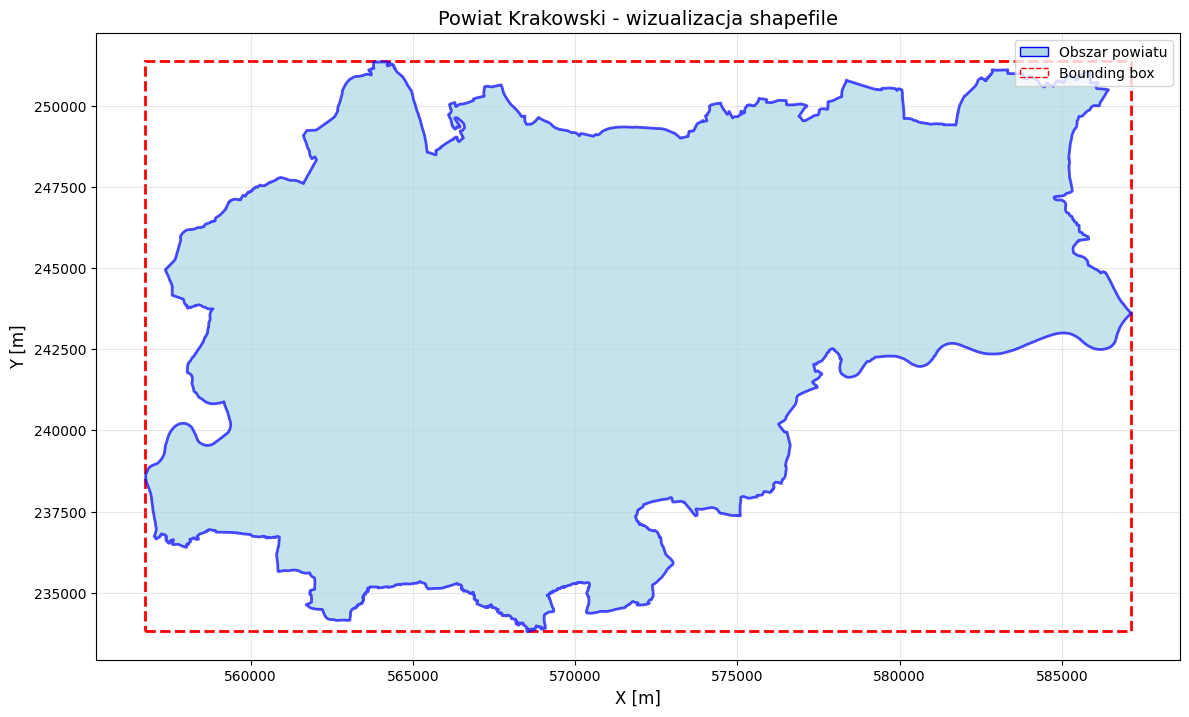

In [95]:
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(ax=ax, facecolor='lightblue', edgecolor='blue', linewidth=2, alpha=0.7)

from matplotlib.patches import Rectangle
bbox_rect = Rectangle((bounds[0], bounds[1]), bbox_width, bbox_height, 
                       fill=False, edgecolor='red', linewidth=2, linestyle='--')
ax.add_patch(bbox_rect)

ax.set_title("Powiat Krakowski - wizualizacja shapefile", fontsize=14)
ax.set_xlabel("X [m]", fontsize=12)
ax.set_ylabel("Y [m]", fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='blue', label='Obszar powiatu'),
    Patch(fill=False, edgecolor='red', linestyle='--', label='Bounding box')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


### Implementacja metody Monte Carlo dla estymacji powierzchni


In [96]:
def estimate_area_monte_carlo(geometry, bounds, n_points, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    minx, miny, maxx, maxy = bounds
    
    x_random = np.random.uniform(minx, maxx, n_points)
    y_random = np.random.uniform(miny, maxy, n_points)
    
    points_inside = 0
    for i in range(n_points):
        point = Point(x_random[i], y_random[i])
        if geometry.contains(point):
            points_inside += 1
    
    bbox_area = (maxx - minx) * (maxy - miny)
    estimated_area = bbox_area * (points_inside / n_points)
    
    return estimated_area, points_inside


### Analiza zbieżności - eksperymenty z różnymi wartościami STEPS

Wykonamy serię eksperymentów z różnymi wartościami parametru STEPS, aby empirycznie zweryfikować teoretyczną zależność między liczbą iteracji a dokładnością oszacowania powierzchni.


In [97]:
steps_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

results = []

print("Running convergence experiments...")
print("=" * 80)

for steps in steps_values:
    estimated_area, points_inside = estimate_area_monte_carlo(geometry, bounds, steps, seed=42)
    
    absolute_error = abs(estimated_area - true_area)
    relative_error_pct = (absolute_error / true_area) * 100
    
    rms_error = np.sqrt((estimated_area - true_area)**2 / true_area**2) * 100
    
    results.append({
        'STEPS': steps,
        'Estimated Area (m²)': estimated_area,
        'True Area (m²)': true_area,
        'Absolute Error (m²)': absolute_error,
        'Relative Error (%)': relative_error_pct,
        'RMS Error (%)': rms_error,
        'Points Inside': points_inside
    })
    
    print(f"STEPS: {steps:>9,} | Estimated: {estimated_area:>14,.2f} m² | "
          f"Error: {relative_error_pct:>6.2f}% | RMS: {rms_error:>6.2f}%")

print("=" * 80)
print("All experiments completed!")

df_results = pd.DataFrame(results)
print("\nDetailed results:")
display(df_results.style.format({
    'STEPS': '{:,}',
    'Estimated Area (m²)': '{:,.2f}',
    'True Area (m²)': '{:,.2f}',
    'Absolute Error (m²)': '{:,.2f}',
    'Relative Error (%)': '{:.2f}',
    'RMS Error (%)': '{:.2f}',
    'Points Inside': '{:,}'
}))


Running convergence experiments...
STEPS:       100 | Estimated: 304,059,013.62 m² | Error:   6.85% | RMS:   6.85%
STEPS:       500 | Estimated: 338,198,973.04 m² | Error:   3.61% | RMS:   3.61%
STEPS:     1,000 | Estimated: 324,329,614.53 m² | Error:   0.64% | RMS:   0.64%
STEPS:     5,000 | Estimated: 324,863,051.39 m² | Error:   0.48% | RMS:   0.48%
STEPS:    10,000 | Estimated: 326,410,018.31 m² | Error:   0.01% | RMS:   0.01%
STEPS:    50,000 | Estimated: 325,940,593.86 m² | Error:   0.15% | RMS:   0.15%
STEPS:   100,000 | Estimated: 326,772,755.37 m² | Error:   0.11% | RMS:   0.11%
STEPS:   500,000 | Estimated: 326,464,428.87 m² | Error:   0.01% | RMS:   0.01%
STEPS: 1,000,000 | Estimated: 326,242,519.13 m² | Error:   0.06% | RMS:   0.06%
All experiments completed!

Detailed results:


,STEPS,Estimated Area (m²),True Area (m²),Absolute Error (m²),Relative Error (%),RMS Error (%),Points Inside
0,100,"304,059,013.62","326,428,927.86","22,369,914.24",6.85,6.85,57
1,500,"338,198,973.04","326,428,927.86","11,770,045.18",3.61,3.61,317
2,"1,000","324,329,614.53","326,428,927.86","2,099,313.33",0.64,0.64,608
3,"5,000","324,863,051.39","326,428,927.86","1,565,876.47",0.48,0.48,"3,045"
4,"10,000","326,410,018.31","326,428,927.86","18,909.56",0.01,0.01,"6,119"
5,"50,000","325,940,593.86","326,428,927.86","488,334.00",0.15,0.15,"30,551"
6,"100,000","326,772,755.37","326,428,927.86","343,827.51",0.11,0.11,"61,258"
7,"500,000","326,464,428.87","326,428,927.86","35,501.00",0.01,0.01,"306,001"
8,"1,000,000","326,242,519.13","326,428,927.86","186,408.73",0.06,0.06,"611,586"


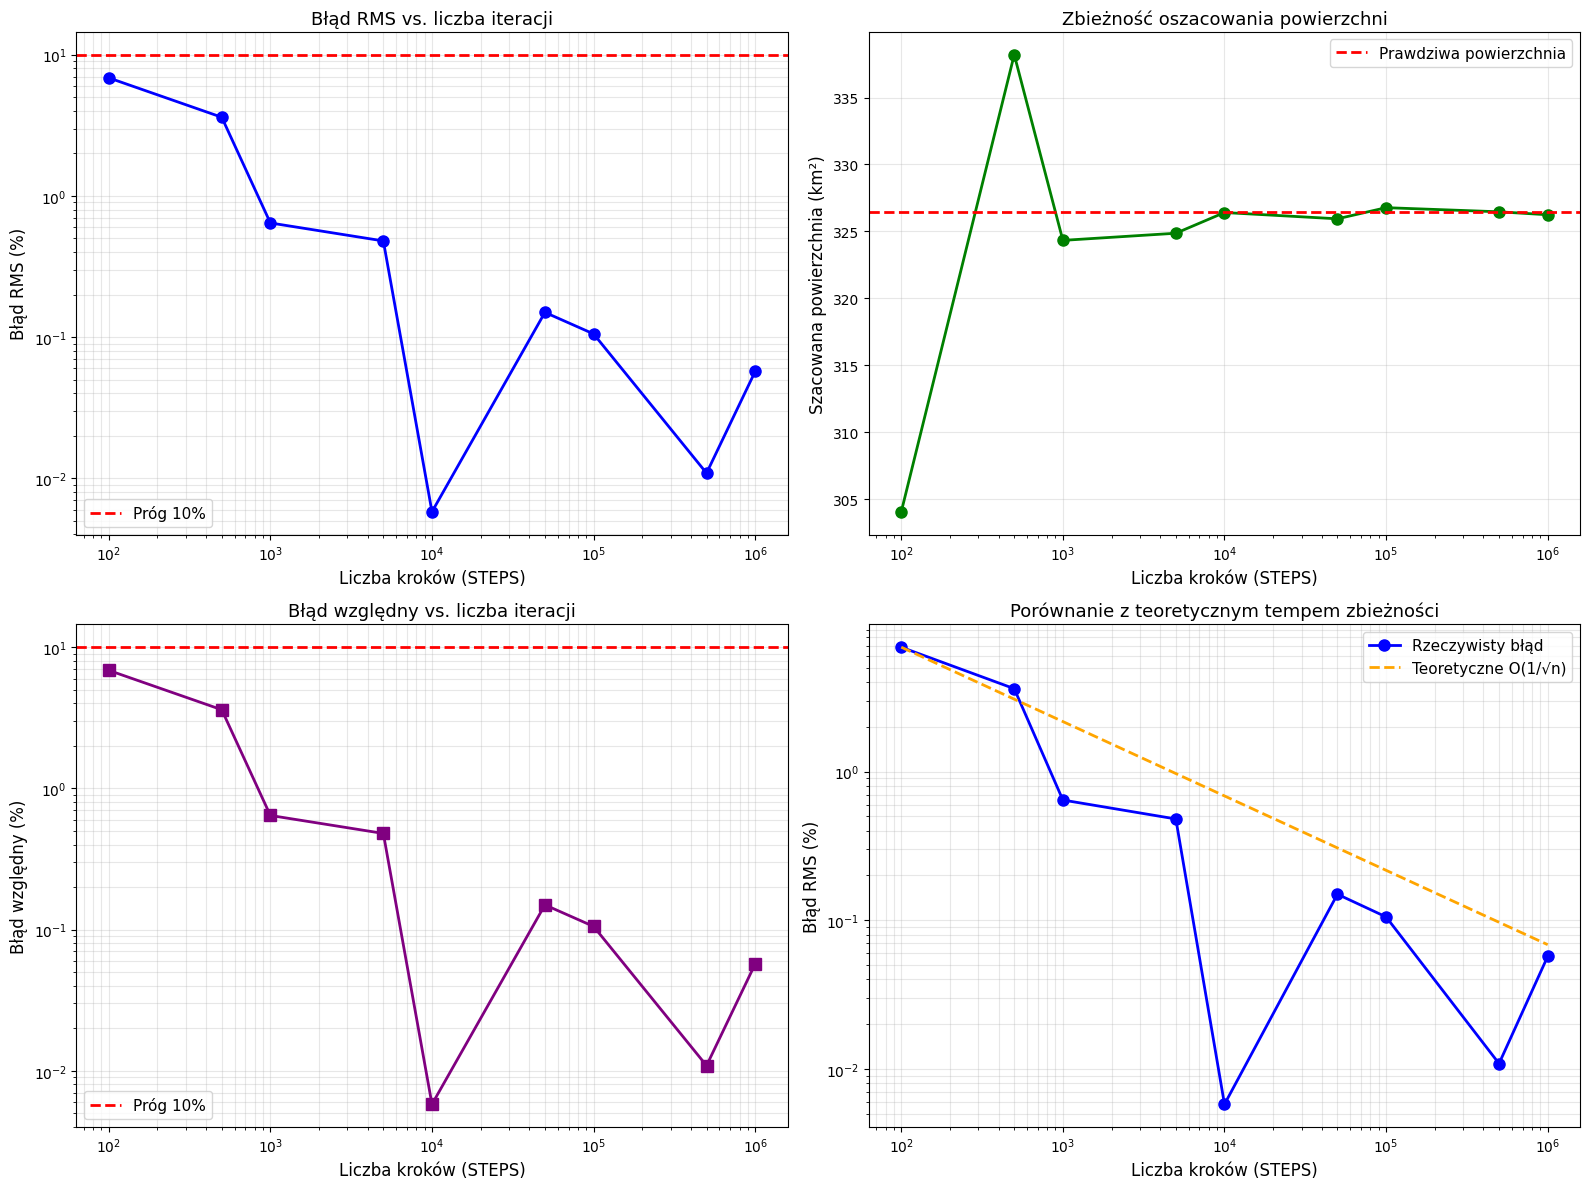

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
ax1.loglog(df_results['STEPS'], df_results['RMS Error (%)'], 'o-', 
           linewidth=2, markersize=8, color='blue')
ax1.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Próg 10%')
ax1.set_xlabel('Liczba kroków (STEPS)', fontsize=12)
ax1.set_ylabel('Błąd RMS (%)', fontsize=12)
ax1.set_title('Błąd RMS vs. liczba iteracji', fontsize=13)
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend(fontsize=11)

ax2 = axes[0, 1]
ax2.semilogx(df_results['STEPS'], df_results['Estimated Area (m²)'] / 1_000_000, 
             'o-', linewidth=2, markersize=8, color='green')
ax2.axhline(y=true_area / 1_000_000, color='red', linestyle='--', 
            linewidth=2, label='Prawdziwa powierzchnia')
ax2.set_xlabel('Liczba kroków (STEPS)', fontsize=12)
ax2.set_ylabel('Szacowana powierzchnia (km²)', fontsize=12)
ax2.set_title('Zbieżność oszacowania powierzchni', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

ax3 = axes[1, 0]
ax3.loglog(df_results['STEPS'], df_results['Relative Error (%)'], 's-', 
           linewidth=2, markersize=8, color='purple')
ax3.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Próg 10%')
ax3.set_xlabel('Liczba kroków (STEPS)', fontsize=12)
ax3.set_ylabel('Błąd względny (%)', fontsize=12)
ax3.set_title('Błąd względny vs. liczba iteracji', fontsize=13)
ax3.grid(True, which="both", ls="-", alpha=0.3)
ax3.legend(fontsize=11)

ax4 = axes[1, 1]
steps_array = np.array(df_results['STEPS'])
errors_array = np.array(df_results['RMS Error (%)'])

ax4.loglog(steps_array, errors_array, 'o-', linewidth=2, markersize=8, 
           color='blue', label='Rzeczywisty błąd')

theoretical = errors_array[0] * np.sqrt(steps_array[0] / steps_array)
ax4.loglog(steps_array, theoretical, '--', linewidth=2, color='orange', 
           label='Teoretyczne O(1/√n)')

ax4.set_xlabel('Liczba kroków (STEPS)', fontsize=12)
ax4.set_ylabel('Błąd RMS (%)', fontsize=12)
ax4.set_title('Porównanie z teoretycznym tempem zbieżności', fontsize=13)
ax4.grid(True, which="both", ls="-", alpha=0.3)
ax4.legend(fontsize=11)

plt.tight_layout()
plt.show()


### Określenie optymalnej liczby kroków dla zbieżności ≤10%


In [99]:
threshold = 10.0

converged = df_results[df_results['RMS Error (%)'] <= threshold]

if len(converged) > 0:
    optimal_steps = converged['STEPS'].min()
    optimal_row = df_results[df_results['STEPS'] == optimal_steps].iloc[0]
    
    print("=" * 80)
    print(f"OPTYMALNA LICZBA KROKÓW dla zbieżności ≤10%: {optimal_steps:,}")
    print("=" * 80)
    print(f"\nDla STEPS = {optimal_steps:,}:")
    print(f"  Szacowana powierzchnia: {optimal_row['Estimated Area (m²)']:,.2f} m² "
          f"({optimal_row['Estimated Area (m²)'] / 1_000_000:.2f} km²)")
    print(f"  Prawdziwa powierzchnia: {optimal_row['True Area (m²)']:,.2f} m² "
          f"({optimal_row['True Area (m²)'] / 1_000_000:.2f} km²)")
    print(f"  Błąd bezwzględny:       {optimal_row['Absolute Error (m²)']:,.2f} m²")
    print(f"  Błąd względny:          {optimal_row['Relative Error (%)']:.2f}%")
    print(f"  Błąd RMS:               {optimal_row['RMS Error (%)']:.2f}%")
    print(f"  Punkty wewnątrz:        {optimal_row['Points Inside']:,.0f} / {optimal_steps:,}")
    print("=" * 80)
    
    print(f"\nAnaliza efektywności:")
    print(f"  Przy STEPS = {optimal_steps:,}, osiągamy błąd {optimal_row['RMS Error (%)']:.2f}%")
    
    larger_steps = df_results[df_results['STEPS'] > optimal_steps]
    if len(larger_steps) > 0:
        next_row = larger_steps.iloc[0]
        improvement = optimal_row['RMS Error (%)'] - next_row['RMS Error (%)']
        cost_ratio = next_row['STEPS'] / optimal_steps
        print(f"  Zwiększenie do STEPS = {int(next_row['STEPS']):,} "
              f"({cost_ratio:.1f}x więcej obliczeń)")
        print(f"    → poprawia błąd tylko o {improvement:.2f} punktów procentowych")
        print(f"    → nowy błąd: {next_row['RMS Error (%)']:.2f}%")
else:
    print("UWAGA: Żadna z testowanych wartości STEPS nie osiągnęła progu 10%!")
    print(f"Minimalne osiągnięte RMS: {df_results['RMS Error (%)'].min():.2f}% "
          f"dla STEPS = {df_results.loc[df_results['RMS Error (%)'].idxmin(), 'STEPS']:,.0f}")


OPTYMALNA LICZBA KROKÓW dla zbieżności ≤10%: 100

Dla STEPS = 100:
  Szacowana powierzchnia: 304,059,013.62 m² (304.06 km²)
  Prawdziwa powierzchnia: 326,428,927.86 m² (326.43 km²)
  Błąd bezwzględny:       22,369,914.24 m²
  Błąd względny:          6.85%
  Błąd RMS:               6.85%
  Punkty wewnątrz:        57 / 100

Analiza efektywności:
  Przy STEPS = 100, osiągamy błąd 6.85%
  Zwiększenie do STEPS = 500 (5.0x więcej obliczeń)
    → poprawia błąd tylko o 3.25 punktów procentowych
    → nowy błąd: 3.61%


### Wizualizacja rozmieszczenia punktów dla wybranych wartości STEPS


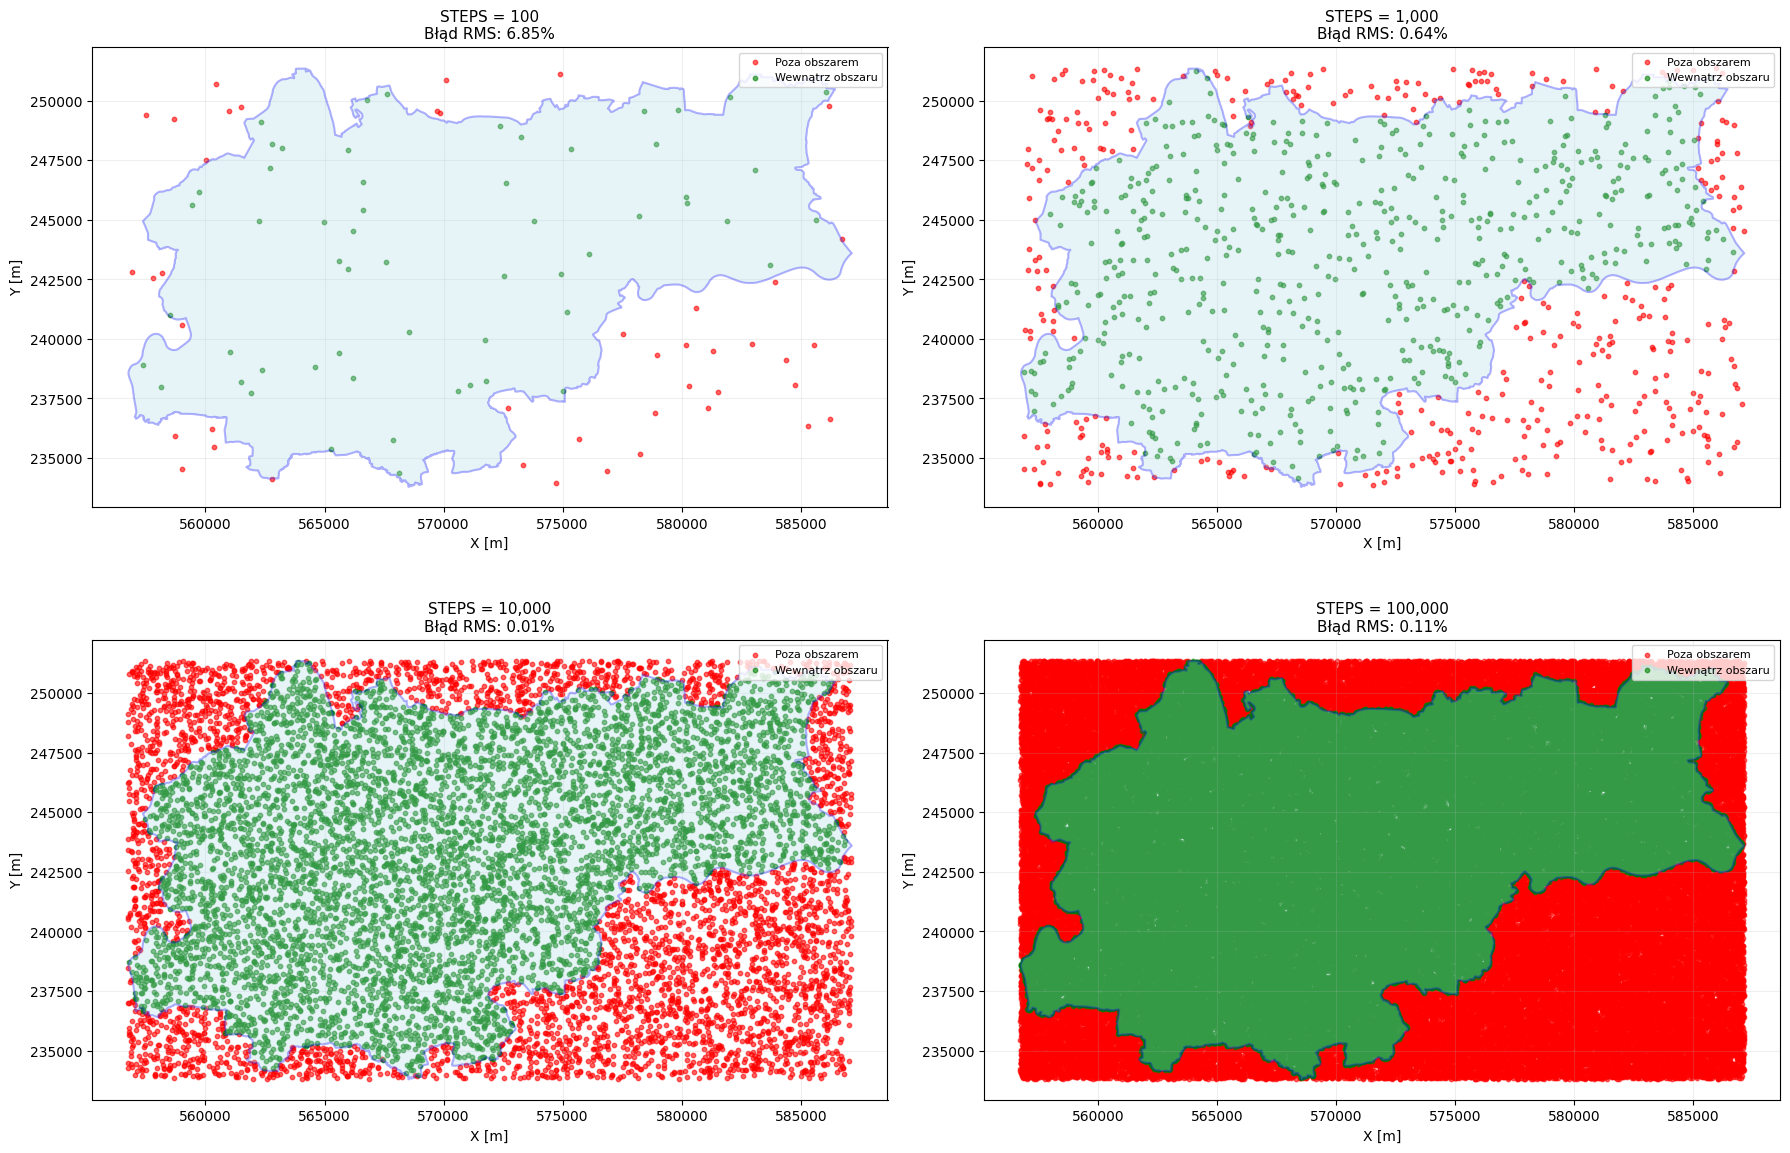

In [105]:
selected_steps = [100, 1000, 10000, 100000]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for idx, steps in enumerate(selected_steps):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    np.random.seed(42)
    minx, miny, maxx, maxy = bounds
    x_random = np.random.uniform(minx, maxx, steps)
    y_random = np.random.uniform(miny, maxy, steps)
    
    inside_mask = []
    for i in range(steps):
        point = Point(x_random[i], y_random[i])
        inside_mask.append(geometry.contains(point))
    
    inside_mask = np.array(inside_mask)
    
    gdf.plot(ax=ax, facecolor='lightblue', edgecolor='blue', 
             linewidth=1.5, alpha=0.3)
    
    ax.scatter(x_random[~inside_mask], y_random[~inside_mask], 
               c='red', s=10, alpha=0.6, label='Poza obszarem')
    ax.scatter(x_random[inside_mask], y_random[inside_mask], 
               c='green', s=10, alpha=0.6, label='Wewnątrz obszaru')
    
    result_row = df_results[df_results['STEPS'] == steps].iloc[0]
    
    ax.set_title(f"STEPS = {steps:,}\n"
                 f"Błąd RMS: {result_row['RMS Error (%)']:.2f}%", 
                 fontsize=11)
    ax.set_xlabel("X [m]", fontsize=10)
    ax.set_ylabel("Y [m]", fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()
